# Data Analysis for Top Actors to Hire

## Import pandas and data files

In [1]:
import pandas as pd

In [2]:
!ls

ActorDataAnalysis.ipynb            InitialDataExploration.ipynb
ActorsFigure.png                   README.md
Earth_Movie_Analysis_Project.ipynb zippedData


In [3]:
!ls zippedData

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


## Get list of top movies by net gain

In [4]:
#read the csv file about movie budgets
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
#create a new column that has the year as an integer
tn_movie_budgets['year_int'] = tn_movie_budgets['release_date'].str[-4:].astype(int)

#get info from movies since 2010 because that's as far back as the imdb data goes
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['year_int'] >= 2010]

tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2194 non-null   int64 
 1   release_date       2194 non-null   object
 2   movie              2194 non-null   object
 3   production_budget  2194 non-null   object
 4   domestic_gross     2194 non-null   object
 5   worldwide_gross    2194 non-null   object
 6   year_int           2194 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 137.1+ KB


In [7]:
#convert the values in the worldwide gross column to integers
tn_movie_budgets["ww_gross_int"] = tn_movie_budgets["worldwide_gross"].replace("[\$,]", "", regex=True).astype(int)

#convert the values in the production budget column to integers
tn_movie_budgets["pro_budget_int"] = tn_movie_budgets["production_budget"].replace("[\$,]", "", regex=True).astype(int)

#create a new column that takes the difference 
tn_movie_budgets["net_difference_int"] = tn_movie_budgets["ww_gross_int"] - tn_movie_budgets["pro_budget_int"]

#create a new column that finds the best value
#value is calculated by (worldwide gross)/(production budget)
tn_movie_budgets["net_value_ratio"] = tn_movie_budgets["ww_gross_int"] / tn_movie_budgets["pro_budget_int"]

In [8]:
#sort the movies by net difference
movies_sorted_by_dif = tn_movie_budgets.sort_values(by = "net_difference_int", ascending = False)


In [9]:
#get list of top 100 movies
top_100_movies_sorted = movies_sorted_by_dif.head(100)
top_100_movies_names = list(top_100_movies_sorted["movie"].values)

In [10]:
top_100_movies_sorted[top_100_movies_sorted["movie"] == 'Les Intouchables']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,net_difference_int,net_value_ratio
3517,18,"May 25, 2012",Les Intouchables,"$10,800,000","$13,182,281","$484,873,045",2012,484873045,10800000,474073045,44.895652


## Get information on the top 100 movies

In [11]:
#load the imdb data
imdb_title_basics = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
imdb_title_ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
imdb_joined = pd.merge(imdb_title_basics, imdb_title_ratings, how = "left", on = "tconst")
imdb_joined.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [12]:
#this creates a dataframe of imdb info for the top 100 grossing movies
beginning_of_movie_name = [i[:7] for i in top_100_movies_names]
#imdb_top_100_movies = imdb_title_basics[['primary_title']]
#imdb_top_100_movies['title_begins_with'] = imdb_top_100_movies['primary_title'].str[:7]
imdb_joined['title_begins_with'] = imdb_joined['primary_title'].str[:7]
imdb_joined.sort_values(by = "numvotes", ascending=False, inplace = True)
imdb_joined.drop_duplicates(subset='primary_title', keep = 'first', inplace = True)
imdb_top_100_movies = imdb_joined[imdb_joined['primary_title'].isin(top_100_movies_names)]
imdb_top_100_movies

#print(imdb_title_basics['primary_title'].getvalues().str[:7])
#imdb_top_100_movies = imdb_top_100_movies[imdb_top_100_movies['start_year'] == ]
#imdb_top_100_movies[imdb_top_100_movies['original_title'] == 'Harry']
#imdb_top_100_movies.sort_values(by = "numvotes", ascending=False, inplace = True)
#imdb_top_100_movies.drop_duplicates(subset='primary_title', keep = 'first', inplace = True)
#print(imdb_top_100_movies.shape)

#gets the 13 movies that aren't on the list
imdb_top_100_movies_list = list(imdb_top_100_movies["primary_title"].values)
for i in top_100_movies_names:
    if i not in imdb_top_100_movies_list:
        print(i)


Star Wars Ep. VII: The Force Awakens
Harry Potter and the Deathly Hallows: Part II
Star Wars Ep. VIII: The Last Jedi
Harry Potter and the Deathly Hallows: Part I
The Twilight Saga: Breaking Dawn, Part 2
Guardians of the Galaxy Vol 2
Fast and Furious 6
Mission: ImpossibleâFallout
The Twilight Saga: Breaking Dawn, Part 1
Mission: ImpossibleâGhost Protocol
Mission: ImpossibleâRogue Nation
Mei Ren Yu
Les Intouchables


In [13]:
#Check what imdb has for Harry potter instead
imdb_title_basics[imdb_title_basics['primary_title'].str.contains("Harry Potter")]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
457,tt0926084,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"
5859,tt1201607,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011,130.0,"Adventure,Drama,Fantasy"
17273,tt1781796,"Creating the World of Harry Potter, Part 4: So...","Creating the World of Harry Potter, Part 4: So...",2010,54.0,Documentary
20960,tt1867094,The Seekers Guide to Harry Potter,The Seekers Guide to Harry Potter,2010,75.0,Documentary
127195,tt7783322,Harry Potter: A History of Magic,Harry Potter: A History of Magic,2017,59.0,Documentary
133278,tt8358970,The Harry Potter Saga Analyzed,The Harry Potter Saga Analyzed,2018,NaN,Documentary
134218,tt8443702,Harry Potter and the Untold Stories of Hogwarts,Harry Potter and the Untold Stories of Hogwarts,2012,58.0,"Adventure,Comedy,Fantasy"


## Get actors from top films

In [14]:
imdb_title_principals = pd.read_csv("zippedData/imdb.title.principals.csv.gz")
imdb_title_principals.head(20)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [15]:
#filter principals dataframe by only look at actors & actresses
imdb_actors = imdb_title_principals[(imdb_title_principals["category"] == "actor") | (imdb_title_principals["category"] == "actress")]
imdb_actors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402926 entries, 0 to 1028181
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tconst      402926 non-null  object
 1   ordering    402926 non-null  int64 
 2   nconst      402926 non-null  object
 3   category    402926 non-null  object
 4   job         0 non-null       object
 5   characters  325018 non-null  object
dtypes: int64(1), object(5)
memory usage: 21.5+ MB


In [16]:
imdb_name_basics = pd.read_csv("zippedData/imdb.name.basics.csv.gz")
imdb_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [17]:
imdb_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [18]:
#merge name basics dataframe so we can get actors primary names
imdb_actors_merged = pd.merge(imdb_actors, imdb_name_basics, how = "left", on = "nconst")
imdb_actors_merged.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
2,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,"tt1441953,tt1790885,tt2639254,tt3839822"
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358"
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383"


In [19]:
imdb_actors_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402926 entries, 0 to 402925
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tconst              402926 non-null  object 
 1   ordering            402926 non-null  int64  
 2   nconst              402926 non-null  object 
 3   category            402926 non-null  object 
 4   job                 0 non-null       object 
 5   characters          325018 non-null  object 
 6   primary_name        402685 non-null  object 
 7   birth_year          127735 non-null  float64
 8   death_year          3568 non-null    float64
 9   primary_profession  384693 non-null  object 
 10  known_for_titles    389933 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 36.9+ MB


In [20]:
#make a list of the top 100 movies on imdb by tconst value
imdb_top_100_movies_list_id = list(imdb_top_100_movies["tconst"].values)

#filter by only looking at the actors & actresses from the top 100 movies
actors_in_top_100_movies = imdb_actors_merged[imdb_actors_merged['tconst'].isin(imdb_top_100_movies_list_id)]

#count the times their names show up
actors_in_top_100_movies['primary_name'].value_counts().head(20)

Robert Downey Jr.     6
Dwayne Johnson        5
Chris Evans           5
Vin Diesel            4
Josh Hutcherson       4
Chris Hemsworth       4
Scarlett Johansson    4
Ian McKellen          4
Jennifer Lawrence     4
Liam Hemsworth        4
Kristen Wiig          3
Cate Blanchett        3
Chris Pratt           3
Martin Freeman        3
Steve Carell          3
Bradley Cooper        3
Mark Ruffalo          3
Johnny Depp           3
Anne Hathaway         3
Richard Armitage      3
Name: primary_name, dtype: int64

## What about the top 500 films

In [21]:
#get top 500 movies by money made
top_500_movies_sorted = movies_sorted_by_dif.head(500)

#get names of those movies
top_500_movies_names = list(top_500_movies_sorted["movie"].values)

#check if box_office_list is in imdb_list
imdb_top_500_movies = imdb_joined[imdb_joined['primary_title'].isin(top_500_movies_names)]
print(imdb_top_500_movies.shape)
#make a list of the top 100 movies on imdb by tconst value
imdb_top_500_movies_list_id = list(imdb_top_500_movies["tconst"].values)

#filter by only looking at the actors & actresses from the top 100 movies
actors_in_top_500_movies = imdb_actors_merged[imdb_actors_merged['tconst'].isin(imdb_top_500_movies_list_id)]

#count the times their names show up
actors_in_top_500_movies['primary_name'].value_counts().head(20)

(437, 9)


Dwayne Johnson       13
Jennifer Lawrence     9
Robert Downey Jr.     9
Channing Tatum        9
Samuel L. Jackson     8
Johnny Depp           8
Liam Neeson           8
Cate Blanchett        8
Anne Hathaway         8
Mark Wahlberg         7
Kevin Hart            7
Tom Cruise            7
Steve Carell          7
Adam Sandler          7
Woody Harrelson       7
Kevin James           7
Kristen Wiig          7
Emily Blunt           7
Chris Hemsworth       6
Amy Adams             6
Name: primary_name, dtype: int64

## Visualize the results

In [23]:
top_three_actors = actors_in_top_500_movies.loc[actors_in_top_500_movies['category']\
                                == 'actor', 'primary_name'].value_counts().head(3)
top_three_actors_names = list(top_three_actors.index)
print(top_three_actors_names)
top_three_actors_counts = list(top_three_actors.values)
print(top_three_actors_counts)
top_three_actresses = actors_in_top_500_movies.loc[actors_in_top_500_movies['category']\
                                == 'actress', 'primary_name'].value_counts().head(3)
top_three_actresses_names = list(top_three_actresses.index)
top_three_actresses_counts = list(top_three_actresses.values)


['Dwayne Johnson', 'Robert Downey Jr.', 'Channing Tatum']
[13, 9, 9]


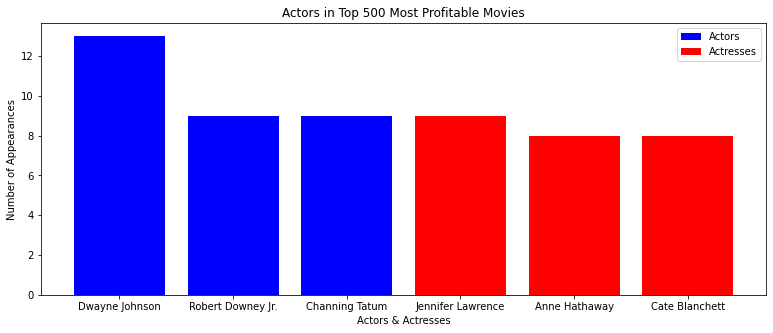

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (13,5))
ax = plt.bar(x=top_three_actors_names, height=top_three_actors_counts, color = 'Blue', label = 'Actors')
ax = plt.bar(x=top_three_actresses_names, height = top_three_actresses_counts, color = 'Red', label = 'Actresses')
plt.xlabel("Actors & Actresses")
plt.ylabel("Number of Appearances")
plt.title("Actors in Top 500 Most Profitable Movies")
plt.legend()
plt.savefig("ActorsFigure.png");

In [25]:
actors_in_top_500_movies[(actors_in_top_500_movies['primary_name']=="Dwayne Johnson") & \
                        (actors_in_top_500_movies['primary_name']=="Jennifer Lawrence")]

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles


# UPDATED EDA AFTER MEETING WITH LINDSEY AND UOHNA

## Getting Data

In [26]:
imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter="\t")
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep="\t", encoding='latin-1')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [27]:
#create a new column that has the year as an integer
tn['year_int'] = tn['release_date'].str[-4:].astype(int)

#get info from movies since 2010 because that's as far back as the imdb data goes
#tn = tn[tn['year_int'] >= 2010]

#convert the values in the worldwide gross column to integers
tn["ww_gross_int"] = tn["worldwide_gross"].replace("[\$,]", "", regex=True).astype(int)

#convert the values in the production budget column to integers
tn["pro_budget_int"] = tn["production_budget"].replace("[\$,]", "", regex=True).astype(int)

#create a new column that calculates return on investment 
tn["roi"] = (tn["ww_gross_int"] - tn["pro_budget_int"])/tn["pro_budget_int"]

#sort the movies by return on investment
tn.sort_values(by = "roi", ascending = False, inplace = True)

In [28]:
imdb_title_rb = pd.merge(imdb_title, imdb_ratings, on = "tconst", how = "left")

In [29]:
imdb_title_crb = pd.merge(imdb_title_rb, imdb_crew, on = "tconst", how = "left")

In [75]:
imdb_title_crb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"nm0765384,nm0749914","nm1360635,nm0749914"


In [30]:
imdb_merged = pd.merge(imdb_title_crb, imdb_name, left_on = "directors", right_on = "nconst", how = "left")

In [31]:
tn_imdb_merged = pd.merge(tn, imdb_merged, left_on = ['movie', 'year_int'], right_on = ['primary_title', 'start_year'], how = 'inner')

In [69]:
tn_imdb_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,...,averagerating,numvotes,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.564740,...,4.2,17763.0,"nm4000389,nm3951039","nm3951039,nm4000389",NaN,NaN,NaN,NaN,NaN,NaN
1,12,"Jan 6, 2012",The Devil Inside,"$1,000,000","$53,262,945","$101,759,490",2012,101759490,1000000,100.759490,...,4.2,33522.0,nm0068587,"nm0068587,nm1834343",nm0068587,William Brent Bell,NaN,NaN,"director,producer,writer","tt3882082,tt1560985,tt2229511,tt0441796"
2,65,"Oct 20, 2010",Paranormal Activity 2,"$3,000,000","$84,752,907","$177,512,032",2010,177512032,3000000,58.170677,...,5.7,93122.0,nm0931095,"nm0675219,nm0484907,nm2317082,nm2305431",nm0931095,Tod Williams,1968.0,NaN,"director,writer,producer","tt0348593,tt0168449,tt1536044,tt0775440"
3,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.073590,...,7.7,400474.0,nm1443502,nm1443502,nm1443502,Jordan Peele,1979.0,NaN,"actor,writer,producer","tt6857112,tt4139124,tt7349662,tt5052448"
4,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008,...,7.4,227964.0,nm1503575,"nm1503575,nm4144120",nm1503575,Barry Jenkins,1979.0,NaN,"writer,director,producer","tt7125860,tt1133989,tt4975722,tt0385108"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,67,"Sep 8, 2015",Chain of Command,"$4,000,000",$0,$0,2015,0,4000000,-1.000000,...,3.5,1189.0,nm0140109,"nm0140109,nm0764704",nm0140109,Kevin Carraway,NaN,NaN,"miscellaneous,producer,director","tt4340720,tt9905492,tt1988781,tt0429671"
1543,91,"Feb 9, 2010",Icarus,"$6,000,000",$0,$0,2010,0,6000000,-1.000000,...,NaN,NaN,nm5921185,"nm10052999,nm5921185",nm5921185,Maarten Diederen,NaN,NaN,"cinematographer,director,writer","tt2585160,tt8892790,tt8852458,tt8852552"
1544,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,2019,0,15000000,-1.000000,...,6.2,173.0,nm0149446,"nm0074488,nm0149446,nm1876954,nm0819803",nm0149446,Gurinder Chadha,1960.0,NaN,"writer,producer,director","tt0197096,tt0286499,tt0963743,tt0106408"
1545,23,"Dec 31, 2014",Pancakes,"$400,000",$0,$0,2014,0,400000,-1.000000,...,NaN,NaN,nm6680025,nm6680025,nm6680025,Yasu Shibuya,NaN,NaN,"director,writer,producer",tt3867652


In [70]:
tn_imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1547 non-null   int64  
 1   release_date        1547 non-null   object 
 2   movie               1547 non-null   object 
 3   production_budget   1547 non-null   object 
 4   domestic_gross      1547 non-null   object 
 5   worldwide_gross     1547 non-null   object 
 6   year_int            1547 non-null   int64  
 7   ww_gross_int        1547 non-null   int64  
 8   pro_budget_int      1547 non-null   int64  
 9   roi                 1547 non-null   float64
 10  tconst              1547 non-null   object 
 11  primary_title       1547 non-null   object 
 12  original_title      1547 non-null   object 
 13  start_year          1547 non-null   int64  
 14  runtime_minutes     1521 non-null   float64
 15  genres              1541 non-null   object 
 16  averag

## Find Actors with highest ROI

In [32]:
imdb_actors = imdb_principals[(imdb_principals["category"] == "actor")\
                              | (imdb_principals["category"] == "actress")]

In [59]:
imdb_actors_name = pd.merge(imdb_actors, imdb_name, how = 'left', on = 'nconst')
imdb_actors_name.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
2,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,"tt1441953,tt1790885,tt2639254,tt3839822"
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358"
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383"


In [48]:
imdb_actors_name_roi = pd.merge(imdb_actors_name, tn_imdb_merged, how = 'left', on = 'tconst')
imdb_actors_name_roi = imdb_actors_name_roi[imdb_actors_name_roi['movie'].notna()]
imdb_actors_name_roi = imdb_actors_name_roi[['tconst', 'nconst_x', 'primary_name_x', 'movie','roi','category']]
imdb_actors_name_roi.head(10)

,tconst,nconst_x,primary_name_x,movie,roi,category
15,tt0475290,nm0000982,Josh Brolin,"Hail, Caesar!",1.916395,actor
16,tt0475290,nm0000123,George Clooney,"Hail, Caesar!",1.916395,actor
17,tt0475290,nm2403277,Alden Ehrenreich,"Hail, Caesar!",1.916395,actor
18,tt0475290,nm0000146,Ralph Fiennes,"Hail, Caesar!",1.916395,actor
314,tt1124037,nm0000190,Matthew McConaughey,Free State of Jones,-0.535255,actor
315,tt1124037,nm1813221,Gugu Mbatha-Raw,Free State of Jones,-0.535255,actress
316,tt1124037,nm0991810,Mahershala Ali,Free State of Jones,-0.535255,actor
317,tt1124037,nm0005392,Keri Russell,Free State of Jones,-0.535255,actress
335,tt1216492,nm0010736,Amy Adams,Leap Year,0.716785,actress
336,tt1216492,nm0328828,Matthew Goode,Leap Year,0.716785,actor


In [65]:
df_actors_stats = imdb_actors_name_roi.groupby(by = ['primary_name_x'])['roi'].describe()
df_actors_stats

,count,mean,std,min,25%,50%,75%,max
primary_name_x,,,,,,,,
50 Cent,2.0,1.076494,0.840824,0.481942,0.779218,1.076494,1.373770,1.671046
A.J. Buckley,1.0,-1.000000,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
A.J. DeLucia,1.0,-1.000000,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
AJ Michalka,2.0,2.317127,2.605445,0.474799,1.395963,2.317127,3.238291,4.159455
Aadit Joshi,1.0,4.626856,NaN,4.626856,4.626856,4.626856,4.626856,4.626856
...,...,...,...,...,...,...,...,...
Zoë Kravitz,3.0,0.715366,1.195718,-0.663439,0.339389,1.342218,1.404769,1.467320
Zulay Henao,1.0,9.107858,NaN,9.107858,9.107858,9.107858,9.107858,9.107858
Émilie Leclerc,1.0,0.756917,NaN,0.756917,0.756917,0.756917,0.756917,0.756917


In [54]:
df_actors_stats.sort_values(by = 'count', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
primary_name_x,,,,,,,,
Dwayne Johnson,17.0,3.137198,2.245722,0.491373,1.683862,2.860516,3.343896,9.716624
Mark Wahlberg,17.0,2.564005,3.177213,-0.214078,0.709365,1.768528,2.745116,10.751126
Steve Carell,17.0,2.833224,4.161355,-0.752539,-0.143981,1.768528,3.755813,12.796370
Robert De Niro,16.0,2.195084,3.233504,-0.815226,-0.094120,0.723900,3.256460,10.257736
Channing Tatum,16.0,3.726827,5.761910,-0.923428,0.551395,1.677502,4.907823,23.364250


In [60]:
df_actors_stats.sort_values(by = '50%', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
primary_name_x,,,,,,,,
Ryan Shoos,1.0,415.56474,NaN,415.56474,415.56474,415.56474,415.56474,415.56474
Reese Mishler,1.0,415.56474,NaN,415.56474,415.56474,415.56474,415.56474,415.56474
Cassidy Gifford,1.0,415.56474,NaN,415.56474,415.56474,415.56474,415.56474,415.56474
Pfeifer Brown,1.0,415.56474,NaN,415.56474,415.56474,415.56474,415.56474,415.56474
Fernanda Andrade,1.0,100.75949,NaN,100.75949,100.75949,100.75949,100.75949,100.75949


In [61]:
df_actors_stats[df_actors_stats['count'] > 1].sort_values(by = '50%', ascending = False).head()

,count,mean,std,min,25%,50%,75%,max
primary_name_x,,,,,,,,
Katie Featherston,2.0,42.867138,21.642473,27.563598,35.215368,42.867138,50.518908,58.170677
Ashley Bell,2.0,21.671616,23.065030,5.362177,13.516896,21.671616,29.826336,37.981056
Olivia Taylor Dudley,2.0,20.780060,29.177575,0.148399,10.464229,20.780060,31.095890,41.411721
Annabelle Wallis,2.0,19.809850,26.456432,1.102328,10.456089,19.809850,29.163611,38.517372
Israel Broussard,2.0,15.066553,12.636703,6.131055,10.598804,15.066553,19.534303,24.002052


In [67]:
df_actors_stats['count'].median()

1.0

In [68]:
df_actors_stats['count'].mean()

1.927703134996801

# HELPING SCOTT USE THE EXPLODE METHOD FOR WRITERS

In [71]:
tn_imdb_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,...,averagerating,numvotes,directors,writers,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.564740,...,4.2,17763.0,"nm4000389,nm3951039","nm3951039,nm4000389",NaN,NaN,NaN,NaN,NaN,NaN
1,12,"Jan 6, 2012",The Devil Inside,"$1,000,000","$53,262,945","$101,759,490",2012,101759490,1000000,100.759490,...,4.2,33522.0,nm0068587,"nm0068587,nm1834343",nm0068587,William Brent Bell,NaN,NaN,"director,producer,writer","tt3882082,tt1560985,tt2229511,tt0441796"
2,65,"Oct 20, 2010",Paranormal Activity 2,"$3,000,000","$84,752,907","$177,512,032",2010,177512032,3000000,58.170677,...,5.7,93122.0,nm0931095,"nm0675219,nm0484907,nm2317082,nm2305431",nm0931095,Tod Williams,1968.0,NaN,"director,writer,producer","tt0348593,tt0168449,tt1536044,tt0775440"
3,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.073590,...,7.7,400474.0,nm1443502,nm1443502,nm1443502,Jordan Peele,1979.0,NaN,"actor,writer,producer","tt6857112,tt4139124,tt7349662,tt5052448"
4,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008,...,7.4,227964.0,nm1503575,"nm1503575,nm4144120",nm1503575,Barry Jenkins,1979.0,NaN,"writer,director,producer","tt7125860,tt1133989,tt4975722,tt0385108"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,67,"Sep 8, 2015",Chain of Command,"$4,000,000",$0,$0,2015,0,4000000,-1.000000,...,3.5,1189.0,nm0140109,"nm0140109,nm0764704",nm0140109,Kevin Carraway,NaN,NaN,"miscellaneous,producer,director","tt4340720,tt9905492,tt1988781,tt0429671"
1543,91,"Feb 9, 2010",Icarus,"$6,000,000",$0,$0,2010,0,6000000,-1.000000,...,NaN,NaN,nm5921185,"nm10052999,nm5921185",nm5921185,Maarten Diederen,NaN,NaN,"cinematographer,director,writer","tt2585160,tt8892790,tt8852458,tt8852552"
1544,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,2019,0,15000000,-1.000000,...,6.2,173.0,nm0149446,"nm0074488,nm0149446,nm1876954,nm0819803",nm0149446,Gurinder Chadha,1960.0,NaN,"writer,producer,director","tt0197096,tt0286499,tt0963743,tt0106408"
1545,23,"Dec 31, 2014",Pancakes,"$400,000",$0,$0,2014,0,400000,-1.000000,...,NaN,NaN,nm6680025,nm6680025,nm6680025,Yasu Shibuya,NaN,NaN,"director,writer,producer",tt3867652


In [72]:
tn_imdb_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1547 non-null   int64  
 1   release_date        1547 non-null   object 
 2   movie               1547 non-null   object 
 3   production_budget   1547 non-null   object 
 4   domestic_gross      1547 non-null   object 
 5   worldwide_gross     1547 non-null   object 
 6   year_int            1547 non-null   int64  
 7   ww_gross_int        1547 non-null   int64  
 8   pro_budget_int      1547 non-null   int64  
 9   roi                 1547 non-null   float64
 10  tconst              1547 non-null   object 
 11  primary_title       1547 non-null   object 
 12  original_title      1547 non-null   object 
 13  start_year          1547 non-null   int64  
 14  runtime_minutes     1521 non-null   float64
 15  genres              1541 non-null   object 
 16  averag

In [111]:
#first, merge the money dataframe with only the crew data frame
#we want to explode the writers column before we add names to it
imdb_writers_name_roi = pd.merge(tn, imdb_title_crb, left_on = ['movie', 'year_int'], right_on = ['primary_title', 'start_year'], how = 'inner')
imdb_writers_name_roi

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.564740,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,17763.0,"nm4000389,nm3951039","nm3951039,nm4000389"
1,12,"Jan 6, 2012",The Devil Inside,"$1,000,000","$53,262,945","$101,759,490",2012,101759490,1000000,100.759490,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,4.2,33522.0,nm0068587,"nm0068587,nm1834343"
2,65,"Oct 20, 2010",Paranormal Activity 2,"$3,000,000","$84,752,907","$177,512,032",2010,177512032,3000000,58.170677,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,5.7,93122.0,nm0931095,"nm0675219,nm0484907,nm2317082,nm2305431"
3,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.073590,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",7.7,400474.0,nm1443502,nm1443502
4,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,7.4,227964.0,nm1503575,"nm1503575,nm4144120"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,67,"Sep 8, 2015",Chain of Command,"$4,000,000",$0,$0,2015,0,4000000,-1.000000,tt4340720,Chain of Command,Echo Effect,2015,88.0,"Action,Thriller",3.5,1189.0,nm0140109,"nm0140109,nm0764704"
1543,91,"Feb 9, 2010",Icarus,"$6,000,000",$0,$0,2010,0,6000000,-1.000000,tt8852552,Icarus,Icarus,2010,78.0,Thriller,NaN,NaN,nm5921185,"nm10052999,nm5921185"
1544,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,2019,0,15000000,-1.000000,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,nm0149446,"nm0074488,nm0149446,nm1876954,nm0819803"
1545,23,"Dec 31, 2014",Pancakes,"$400,000",$0,$0,2014,0,400000,-1.000000,tt3867652,Pancakes,Pancakes,2014,NaN,Drama,NaN,NaN,nm6680025,nm6680025


In [112]:
#only focus on a couple columns that I need
imdb_writers_name_roi = imdb_writers_name_roi[['movie', 'roi', 'writers']]
imdb_writers_name_roi

,movie,roi,writers
0,The Gallows,415.564740,"nm3951039,nm4000389"
1,The Devil Inside,100.759490,"nm0068587,nm1834343"
2,Paranormal Activity 2,58.170677,"nm0675219,nm0484907,nm2317082,nm2305431"
3,Get Out,50.073590,nm1443502
4,Moonlight,42.497008,"nm1503575,nm4144120"
...,...,...,...
1542,Chain of Command,-1.000000,"nm0140109,nm0764704"
1543,Icarus,-1.000000,"nm10052999,nm5921185"
1544,Blinded by the Light,-1.000000,"nm0074488,nm0149446,nm1876954,nm0819803"
1545,Pancakes,-1.000000,nm6680025


In [113]:
#explode the writers column so that multiple writer can be assigned to the same movie
imdb_writers_name_roi = imdb_writers_name_roi.assign(writers=imdb_writers_name_roi['writers'].str.split(",")).explode('writers')
imdb_writers_name_roi

,movie,roi,writers
0,The Gallows,415.564740,nm3951039
0,The Gallows,415.564740,nm4000389
1,The Devil Inside,100.759490,nm0068587
1,The Devil Inside,100.759490,nm1834343
2,Paranormal Activity 2,58.170677,nm0675219
...,...,...,...
1544,Blinded by the Light,-1.000000,nm0819803
1545,Pancakes,-1.000000,nm6680025
1546,Checkmate,-1.000000,nm6548497
1546,Checkmate,-1.000000,nm6548498


In [114]:
#now merge the name dataframe with the writers
imdb_writers_name_roi = pd.merge(imdb_writers_name_roi, imdb_name_basics, left_on = 'writers', right_on = 'nconst', how = 'left')
imdb_writers_name_roi = imdb_writers_name_roi[['movie', 'roi', 'writers', 'nconst', 'primary_name']]
imdb_writers_name_roi

,movie,roi,writers,nconst,primary_name
0,The Gallows,415.564740,nm3951039,nm3951039,Chris Lofing
1,The Gallows,415.564740,nm4000389,nm4000389,Travis Cluff
2,The Devil Inside,100.759490,nm0068587,nm0068587,William Brent Bell
3,The Devil Inside,100.759490,nm1834343,nm1834343,Matthew Peterman
4,Paranormal Activity 2,58.170677,nm0675219,nm0675219,Michael R. Perry
...,...,...,...,...,...
3878,Blinded by the Light,-1.000000,nm0819803,nm0819803,Bruce Springsteen
3879,Pancakes,-1.000000,nm6680025,nm6680025,Yasu Shibuya
3880,Checkmate,-1.000000,nm6548497,nm6548497,Calvin Cox Jr.
3881,Checkmate,-1.000000,nm6548498,nm6548498,Jennifer Lynch


In [115]:
#groupe by writers name and get stats on each writer
df_writer_stats = imdb_writers_name_roi.groupby(by = ['primary_name'])['roi'].describe()
df_writer_stats

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
A. Scott Berg,1.0,-0.572630,NaN,-0.572630,-0.572630,-0.572630,-0.572630,-0.572630
A.A. Milne,2.0,1.152459,0.680149,0.671520,0.911989,1.152459,1.392928,1.633397
Aaron Covington,1.0,3.691016,NaN,3.691016,3.691016,3.691016,3.691016,3.691016
Aaron Guzikowski,2.0,2.200771,1.040159,1.465267,1.833019,2.200771,2.568523,2.936274
Aaron Kandell,2.0,1.952161,1.835586,0.654205,1.303183,1.952161,2.601138,3.250116
...,...,...,...,...,...,...,...,...
Zsuzsa Böszörményi,1.0,-0.882492,NaN,-0.882492,-0.882492,-0.882492,-0.882492,-0.882492
Zupanec Andrej,1.0,-0.984889,NaN,-0.984889,-0.984889,-0.984889,-0.984889,-0.984889
Zümrüt Çavusoglu,1.0,-0.447386,NaN,-0.447386,-0.447386,-0.447386,-0.447386,-0.447386


In [121]:
df_writer_stats.sort_values(by = 'count', ascending = False).head(20)

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Jack Kirby,20.0,2.889340,1.657186,-0.572108,1.908365,3.096791,3.727439,5.827114
Stan Lee,19.0,2.962111,1.623562,-0.572108,2.246460,2.991219,3.749433,5.827114
Nicholas Stoller,11.0,1.572704,0.848239,0.106974,1.062858,1.619335,2.241367,2.577154
Luc Besson,9.0,2.713031,3.649525,0.194991,0.697152,0.807382,2.168113,10.437694
Larry Lieber,8.0,3.667610,1.258411,1.995511,2.906879,3.501397,4.114306,5.827114
Adam McKay,7.0,1.692654,1.430708,0.104292,0.445375,1.662786,2.717467,3.755813
Oren Peli,7.0,27.218912,21.006338,-0.998489,11.988454,27.563598,40.909845,58.170677
Stephen McFeely,7.0,3.051141,1.455308,1.646927,1.911977,3.202364,3.428814,5.827114
Christopher Markus,7.0,3.051141,1.455308,1.646927,1.911977,3.202364,3.428814,5.827114


In [122]:
df_writer_stats.sort_values(by = '50%', ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Chris Lofing,1.0,415.564740,NaN,415.564740,415.564740,415.564740,415.564740,415.564740
Travis Cluff,1.0,415.564740,NaN,415.564740,415.564740,415.564740,415.564740,415.564740
William Brent Bell,1.0,100.759490,NaN,100.759490,100.759490,100.759490,100.759490,100.759490
Matthew Peterman,1.0,100.759490,NaN,100.759490,100.759490,100.759490,100.759490,100.759490
Michael R. Perry,1.0,58.170677,NaN,58.170677,58.170677,58.170677,58.170677,58.170677
Tom Pabst,1.0,58.170677,NaN,58.170677,58.170677,58.170677,58.170677,58.170677
Tarell Alvin McCraney,1.0,42.497008,NaN,42.497008,42.497008,42.497008,42.497008,42.497008
Carey Van Dyke,1.0,41.411721,NaN,41.411721,41.411721,41.411721,41.411721,41.411721
Shane Van Dyke,1.0,41.411721,NaN,41.411721,41.411721,41.411721,41.411721,41.411721
